In [1]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [2]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv


In [0]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm,skew
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [89]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
print(df_train.shape) # 'shape' gives number of rows and columns in dataset
print(df_test.shape)
print(df_train.columns)
print(df_train.dtypes)

(1460, 81)
(1459, 80)
Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'Ga

In [90]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [91]:
#skewness and kurtosis
print("Skewness: %f" % df_train['SalePrice'].skew()) # 0(Zero) for Normal distribution
print("Kurtosis: %f" % df_train['SalePrice'].kurt()) # 3 for Normal distribution

Skewness: 1.882876
Kurtosis: 6.536282


In [92]:
#standardizing data
saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:,np.newaxis]);
#https://stackoverflow.com/questions/29241056/how-does-numpy-newaxis-work-and-when-to-use-it
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83870376]
 [-1.83352844]
 [-1.80092766]
 [-1.78329881]
 [-1.77448439]
 [-1.62337999]
 [-1.61708398]
 [-1.58560389]
 [-1.58560389]
 [-1.5731    ]]

outer range (high) of the distribution:
[[3.82897043]
 [4.04098249]
 [4.49634819]
 [4.71041276]
 [4.73032076]
 [5.06214602]
 [5.42383959]
 [5.59185509]
 [7.10289909]
 [7.22881942]]


In [0]:
def scatter_plot(var): #when independent variable is numerical 
    data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
    data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));
    

def box_plot(var): #usually when independent variable is categorical 
    data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
    f, ax = plt.subplots(figsize=(16, 8))
    fig = sns.boxplot(x=var, y="SalePrice", data=data)
    fig.axis(ymin=0, ymax=800000);
    plt.xticks(rotation=90);
    print(df_train[var].unique())
    print(df_test[var].unique())

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


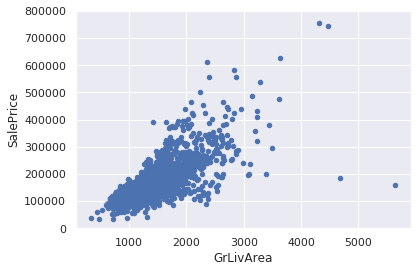

In [94]:
scatter_plot('GrLivArea')

In [95]:
#removing outliers
df_train.sort_values(by = 'GrLivArea', ascending = False)[:2]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644,Unf,0,466,6110,GasA,...,Y,SBrkr,4692,950,0,5642,2,0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2,1418,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,Edwards,PosN,PosN,1Fam,2Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,Stone,762.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2260,Unf,0,878,3138,GasA,...,Y,SBrkr,3138,1538,0,4676,1,0,3,1,3,1,Ex,11,Typ,1,Gd,BuiltIn,2007.0,Fin,3,884,TA,TA,Y,208,406,0,0,0,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [96]:
df_train = df_train.drop(df_train[df_train['Id'] == 1299].index)
df_train = df_train.drop(df_train[df_train['Id'] == 524].index)
df_train.shape

(1458, 81)

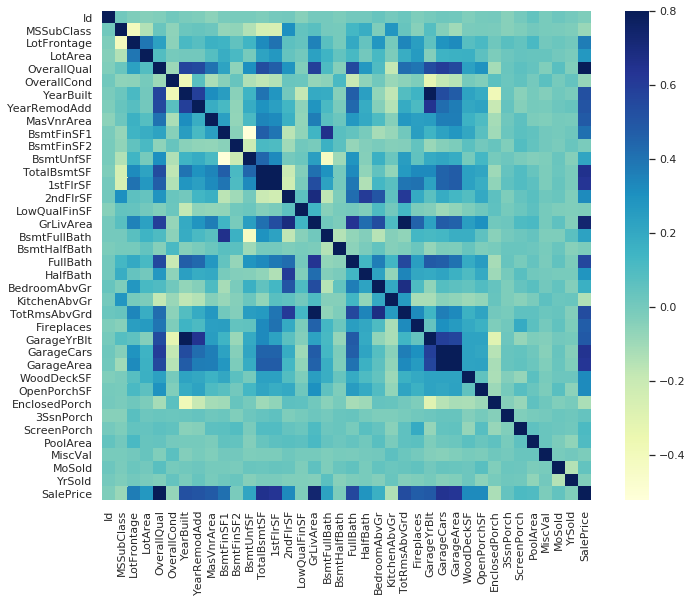

In [97]:
#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat,vmax=.8, square=True,cmap="YlGnBu");

In [98]:
ntrain = df_train.shape[0] #used later to split all_data into train and test set again
ntest = df_test.shape[0]
y_train = df_train.SalePrice.values
all_data = pd.concat((df_train, df_test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2917, 80)


**Handling missing values**

In [99]:
all_total = all_data.isnull().sum().sort_values(ascending=False)
all_percent = (all_data.isnull().sum()/all_data.isnull().count()).sort_values(ascending=False)
all_missing_data = pd.concat([all_total, all_percent], axis=1, keys=['Total', 'Percent'])
print(all_missing_data.head(35))

              Total   Percent
PoolQC         2908  0.996915
MiscFeature    2812  0.964004
Alley          2719  0.932122
Fence          2346  0.804251
FireplaceQu    1420  0.486802
LotFrontage     486  0.166610
GarageQual      159  0.054508
GarageFinish    159  0.054508
GarageYrBlt     159  0.054508
GarageCond      159  0.054508
GarageType      157  0.053822
BsmtCond         82  0.028111
BsmtExposure     82  0.028111
BsmtQual         81  0.027768
BsmtFinType2     80  0.027425
BsmtFinType1     79  0.027083
MasVnrType       24  0.008228
MasVnrArea       23  0.007885
MSZoning          4  0.001371
BsmtFullBath      2  0.000686
BsmtHalfBath      2  0.000686
Utilities         2  0.000686
Functional        2  0.000686
Electrical        1  0.000343
Exterior2nd       1  0.000343
KitchenQual       1  0.000343
Exterior1st       1  0.000343
GarageCars        1  0.000343
TotalBsmtSF       1  0.000343
GarageArea        1  0.000343
BsmtUnfSF         1  0.000343
BsmtFinSF2        1  0.000343
BsmtFinSF1

In [100]:
#dealing with missing data
all_data = all_data.drop((all_missing_data[all_missing_data['Total'] > 2000]).index,1)
#all_data.isnull().sum().max() #just checking that there's no missing data missing...
all_data.shape


(2917, 76)

In [0]:
qualitative = [f for f in all_data.columns if all_data.dtypes[f] == 'object'] #non numerical attributes
quantitative = [f for f in all_data.columns if all_data.dtypes[f] != 'object']

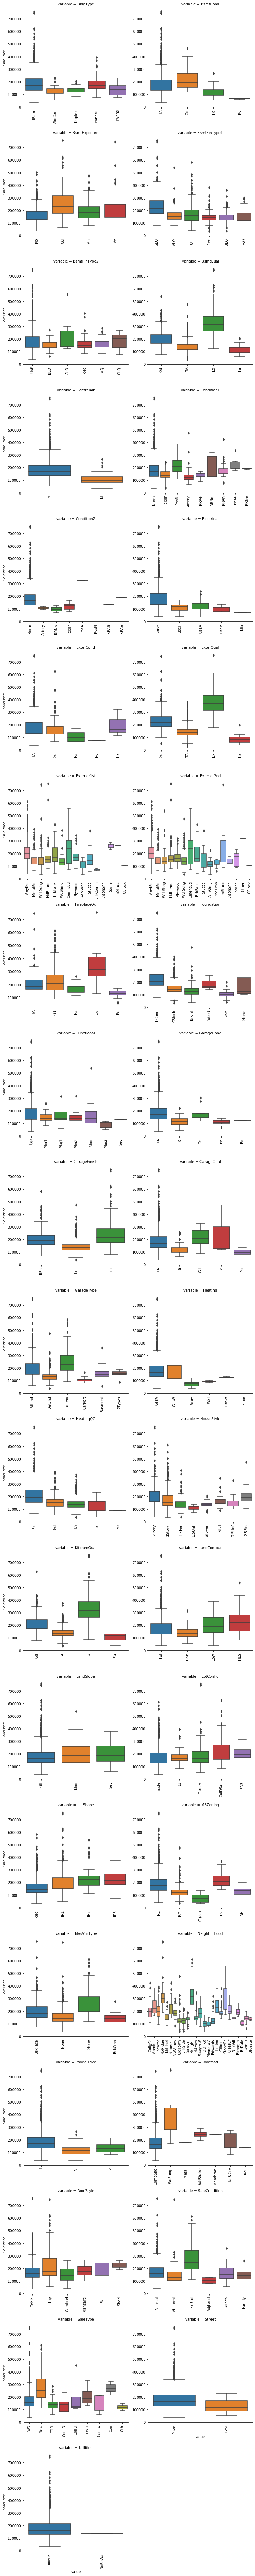

In [17]:
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
    
f = pd.melt(df_train, id_vars=['SalePrice'], value_vars=qualitative)
#https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.melt.html

g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, "value", "SalePrice")

In [18]:
all_data = all_data.drop(['Utilities','LotConfig','LandSlope','BsmtFinType1','BsmtFinType2'], axis=1)
all_data.shape

(2917, 71)

In [0]:
#replacing each missing categorical attribute its most frequent occuring entry

all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])
all_data["Functional"] = all_data["Functional"].fillna("Typ") #data description says NA means typical
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

all_data['Utilities'] = all_data['Utilities'].fillna(all_data['Utilities'].mode()[0])
all_data['LotConfig'] = all_data['LotConfig'].fillna(all_data['LotConfig'].mode()[0])
all_data['LandSlope'] = all_data['LandSlope'].fillna(all_data['LandSlope'].mode()[0])
all_data['BsmtFinType1'] = all_data['BsmtFinType1'].fillna(all_data['BsmtFinType1'].mode()[0])
all_data['BsmtFinType2'] = all_data['BsmtFinType2'].fillna(all_data['BsmtFinType2'].mode()[0])

In [103]:
from sklearn.preprocessing import LabelEncoder

cols = (  
        'ExterQual', 'ExterCond','HeatingQC', 'Electrical', 'KitchenQual', 'Functional',
        'LotShape', 'PavedDrive', 'Street', 'LandContour', 'CentralAir','FireplaceQu','GarageQual','GarageFinish',
'GarageCond','GarageType','BsmtCond','BsmtExposure','BsmtQual','MasVnrType')

# process columns, apply LabelEncoder to categorical features
for c in cols:
    all_data[c].replace(np.nan, 'NAN', inplace=True) #replace missing values with 'NAN'
    lbl=LabelEncoder()
    lbl.fit(list(all_data[c].values)) 
    all_data['en'+c] = lbl.transform(list(all_data[c].values))

# shape        
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2917, 96)


In [104]:
all_data.isna().sum().sort_values(ascending=False).head(15)

LotFrontage     486
GarageYrBlt     159
MasVnrArea       23
BsmtHalfBath      2
BsmtFullBath      2
TotalBsmtSF       1
GarageArea        1
GarageCars        1
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
Functional        0
GarageCond        0
GarageFinish      0
GarageQual        0
dtype: int64

In [105]:
all_data = all_data.drop(['Id','LotFrontage','MasVnrArea','YrSold','MoSold','MiscVal','GarageYrBlt'], axis=1)
all_data.shape

(2917, 89)

In [0]:
# Adding total sqfootage feature 
all_data['TotalSF'] = all_data['GrLivArea']+all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']-all_data['LowQualFinSF']

In [0]:
#ADDED
all_data = all_data.drop(['GrLivArea','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF'], axis = 1) 

In [0]:
# Adding misceleneous total sqfootage feature 
all_data['MiscTotalSF'] = all_data['LotArea']+all_data['PoolArea']+all_data['WoodDeckSF'] + all_data['OpenPorchSF'] + all_data['EnclosedPorch']+all_data['3SsnPorch'] + all_data['ScreenPorch'] + all_data['PoolArea']


In [0]:
all_data = all_data.drop(['LotArea','PoolArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea'], axis = 1) 

In [108]:
all_data[['OverallQual','OverallCond']].head()

,OverallQual,OverallCond
0,7,5
1,6,8
2,7,5
3,7,5
4,8,5


In [0]:
all_data['Overall'] = all_data['OverallQual'] + all_data['OverallCond'] 


In [0]:
#ADDED
all_data = all_data.drop(['OverallQual','OverallCond'], axis = 1) 

In [0]:
all_data['Bath'] = all_data['BsmtFullBath'] + all_data['BsmtHalfBath'] +all_data['FullBath'] + all_data['HalfBath'] 

In [0]:
#ADDED
all_data = all_data.drop(['BsmtFullBath','BsmtHalfBath','FullBath','HalfBath'], axis = 1)

In [111]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
PoolArea,17.688664
LotArea,13.109495
MiscTotalSF,12.951971
LowQualFinSF,12.084539
3SsnPorch,11.372080
KitchenAbvGr,4.300550
BsmtFinSF2,4.143683
EnclosedPorch,4.002344
ScreenPorch,3.945101
BsmtHalfBath,3.928397


In [112]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    all_data[feat] = boxcox1p(all_data[feat], lam)
    
#all_data[skewed_features] = np.log1p(all_data[skewed_features])

There are 54 skewed numerical features to Box Cox transform


In [113]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2917, 301)


In [0]:
y_train = np.log1p(y_train)

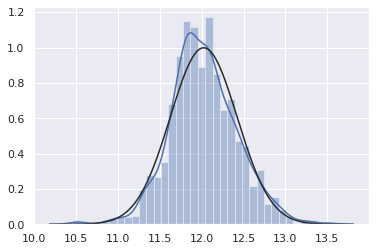

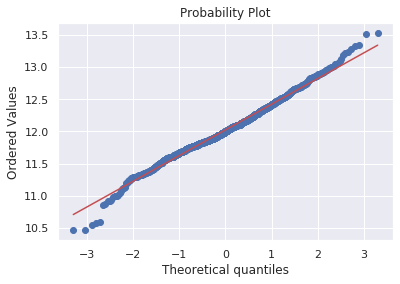

In [33]:
sns.distplot(y_train, fit=norm);
fig = plt.figure()
res = stats.probplot(y_train, plot=plt)

In [116]:
#splitting train and test sets
train = all_data[:ntrain]
test = all_data[ntrain:]
print(df_test.shape)
print(test.shape)

(1459, 80)
(1459, 301)


In [0]:
from sklearn.preprocessing import RobustScaler #handles outliers better than StandardScaler

sc = RobustScaler()
train = sc.fit_transform(train)
test = sc.transform(test)

In [0]:
#ONE Stacked Regressions
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV

from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [0]:
#split the training set for cross validation
#these variables will be used in parameter tuning of models
dx_train, dx_test, dy_train, dy_test = train_test_split(train, 
                                                    y_train, test_size=0.30, 
                                                    random_state=42)

XGBOOST

In [133]:
max_depth_set =  [1,2,3,4,5,6,7,8]
n_estimators =  [5, 10, 50,100,200,300]
from xgboost import XGBClassifier

import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
FINAL_CV_RMS = []
for depth in max_depth_set:
  print("Depth is :",depth)
  CV_RMS = []
  for n in n_estimators:
    print("Estimator : ",n)

    model = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,max_depth = depth, alpha = 10, n_estimators = n)

    model.fit(dx_train, dy_train)
    pred = model.predict(dx_test)  
    rmse = np.sqrt(mean_squared_error(dy_test,pred)) 
    CV_RMS.append(rmse)
    print("Depth ",depth,"Estimator ",n , "RMS ",rmse)
  FINAL_CV_RMS.append(CV_RMS)   

Depth is : 1
Estimator :  5
[10:34:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Depth  1 Estimator  5 RMS  6.809996932449299
Estimator :  10
[10:34:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Depth  1 Estimator  10 RMS  4.027971088749233
Estimator :  50
[10:34:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Depth  1 Estimator  50 RMS  0.18028101154010984
Estimator :  100
[10:34:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Depth  1 Estimator  100 RMS  0.14251200048529364
Estimator :  200
[10:34:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Depth  1 Estimator  200 RMS  0.12602121320204662
Estimator :  300
[10:34:32] WARNIN

Heat map for CV data 

X-axis : depth
Y-axis : n_estimator


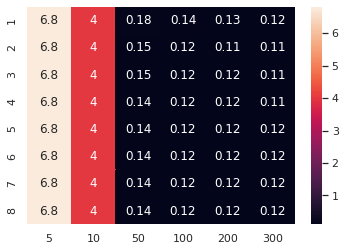

In [134]:
import seaborn as sns
print("Heat map for CV data \n")
print("X-axis : depth")
print("Y-axis : n_estimator")
ax = sns.heatmap(FINAL_CV_RMS,annot = True,xticklabels=n_estimators ,yticklabels=max_depth_set)

Train with best parameters

In [135]:
model = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,max_depth = 2, alpha = 10, n_estimators = 300)
model.fit(train,y_train)

[10:36:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=None, n_estimators=300,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [0]:
pred = model.predict(test)
sub = pd.DataFrame()
sub['Id'] = df_test.Id
sub['SalePrice'] = 2.718281828459045**pred

In [0]:
sub.to_csv('SalePrice3.csv',index=False)
from google.colab import files
files.download('SalePrice3.csv')

Random forest regressor

In [129]:
from sklearn.ensemble import RandomForestRegressor

max_depth_set =  [2,3,4,5,6,7,8,9,10,11,12,13,14]
n_estimators =  [5, 10, 50,100,200]
from xgboost import XGBClassifier

import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
FINAL_CV_RMS = []
for depth in max_depth_set:
  print("Depth is :",depth)
  CV_RMS = []
  for n in n_estimators:
    print("Estimator : ",n)
    
    model = RandomForestRegressor( max_depth = depth, n_estimators = n)

    model.fit(dx_train, dy_train)
    pred = model.predict(dx_test)  
    rmse = np.sqrt(mean_squared_error(dy_test,pred)) 
    CV_RMS.append(rmse)
  FINAL_CV_RMS.append(CV_RMS)

Depth is : 2
Estimator :  5
Estimator :  10
Estimator :  50
Estimator :  100
Estimator :  200
Depth is : 3
Estimator :  5
Estimator :  10
Estimator :  50
Estimator :  100
Estimator :  200
Depth is : 4
Estimator :  5
Estimator :  10
Estimator :  50
Estimator :  100
Estimator :  200
Depth is : 5
Estimator :  5
Estimator :  10
Estimator :  50
Estimator :  100
Estimator :  200
Depth is : 6
Estimator :  5
Estimator :  10
Estimator :  50
Estimator :  100
Estimator :  200
Depth is : 7
Estimator :  5
Estimator :  10
Estimator :  50
Estimator :  100
Estimator :  200
Depth is : 8
Estimator :  5
Estimator :  10
Estimator :  50
Estimator :  100
Estimator :  200
Depth is : 9
Estimator :  5
Estimator :  10
Estimator :  50
Estimator :  100
Estimator :  200
Depth is : 10
Estimator :  5
Estimator :  10
Estimator :  50
Estimator :  100
Estimator :  200
Depth is : 11
Estimator :  5
Estimator :  10
Estimator :  50
Estimator :  100
Estimator :  200
Depth is : 12
Estimator :  5
Estimator :  10
Estimator :  